In [1]:
using JOLI
using Waveform
using PyPlot

In [2]:
n = 50*[1;1;1];
d = 12.5*[1;1;1];
o = 0.0*[1;1;1];
v0 = 2000;
freq = 8.0;
λ = v0/freq;

t0 = 0.0;
f0 = 10.0;
unit = "m/s";
xsrc = [(n.*d)[1]/2];
ysrc = [(n.*d)[2]/2];
zsrc = [100.0];
xrec = linspace(0.0,(n.*d)[1]::Float64,n[1]);
yrec = linspace(0.0,(n.*d)[2]::Float64,n[2]);
zrec = [100.0];
freqs = [freq];
nsrc = length(xsrc)*length(ysrc)*length(zsrc);
nfreq = length(freqs)
model = Model{Int64,Float64}(n,d,o,t0,f0,unit,freqs,xsrc,ysrc,zsrc,xrec,yrec,zrec);

comp_n = n;
comp_d = d;
comp_o = o;
npml = convert(Int,λ/minimum(comp_d))*ones(Int64,(2,3));
npml = 10*ones(Int64,(2,3));
scheme = Waveform.helm3d_operto27;
cut_pml = true;
implicit_matrix = true;
srcfreqmask = trues(nsrc,nfreq);
misfit = Waveform.least_squares;
lsopts = LinSolveOpts(solver=:fgmres,maxinnerit=5,tol=1e-6);
lsopts.precond = :mlgmres;
opts = PDEopts{Int64,Float64}(scheme,comp_n,comp_d,comp_o,cut_pml,implicit_matrix,npml,misfit,srcfreqmask,lsopts);

v = v0*ones(Float64,n...);
v = vec(v);
opts.implicit_matrix = true;

(H,comp_grid,T,DT_adj,P) = helmholtz_system(v,model,freq,opts);
nt = comp_grid.comp_n
q = zeros(eltype(H),tuple(nt...));
q[div.(nt,2)...] = 1.0;
q = vec(q);
u = H\q;
u = reshape(u,nt...);

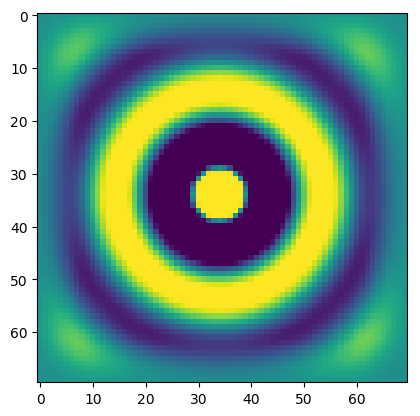

PyObject <matplotlib.image.AxesImage object at 0x10b387d90>

In [3]:
clim = 0.5
imshow(real(u[:,:,div(nt[3],2)]),vmin=-clim,vmax=clim)